In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("D:/datasets/Titanic-Dataset.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

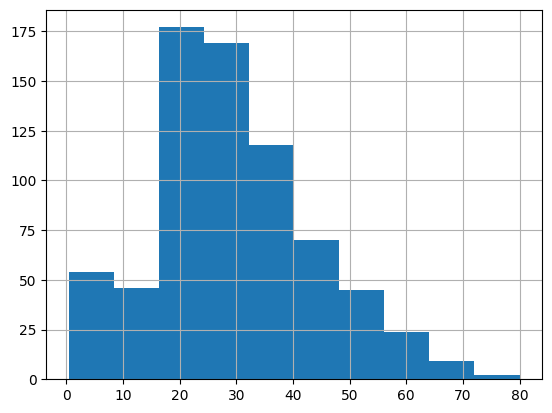

In [15]:
df['Age'].hist()

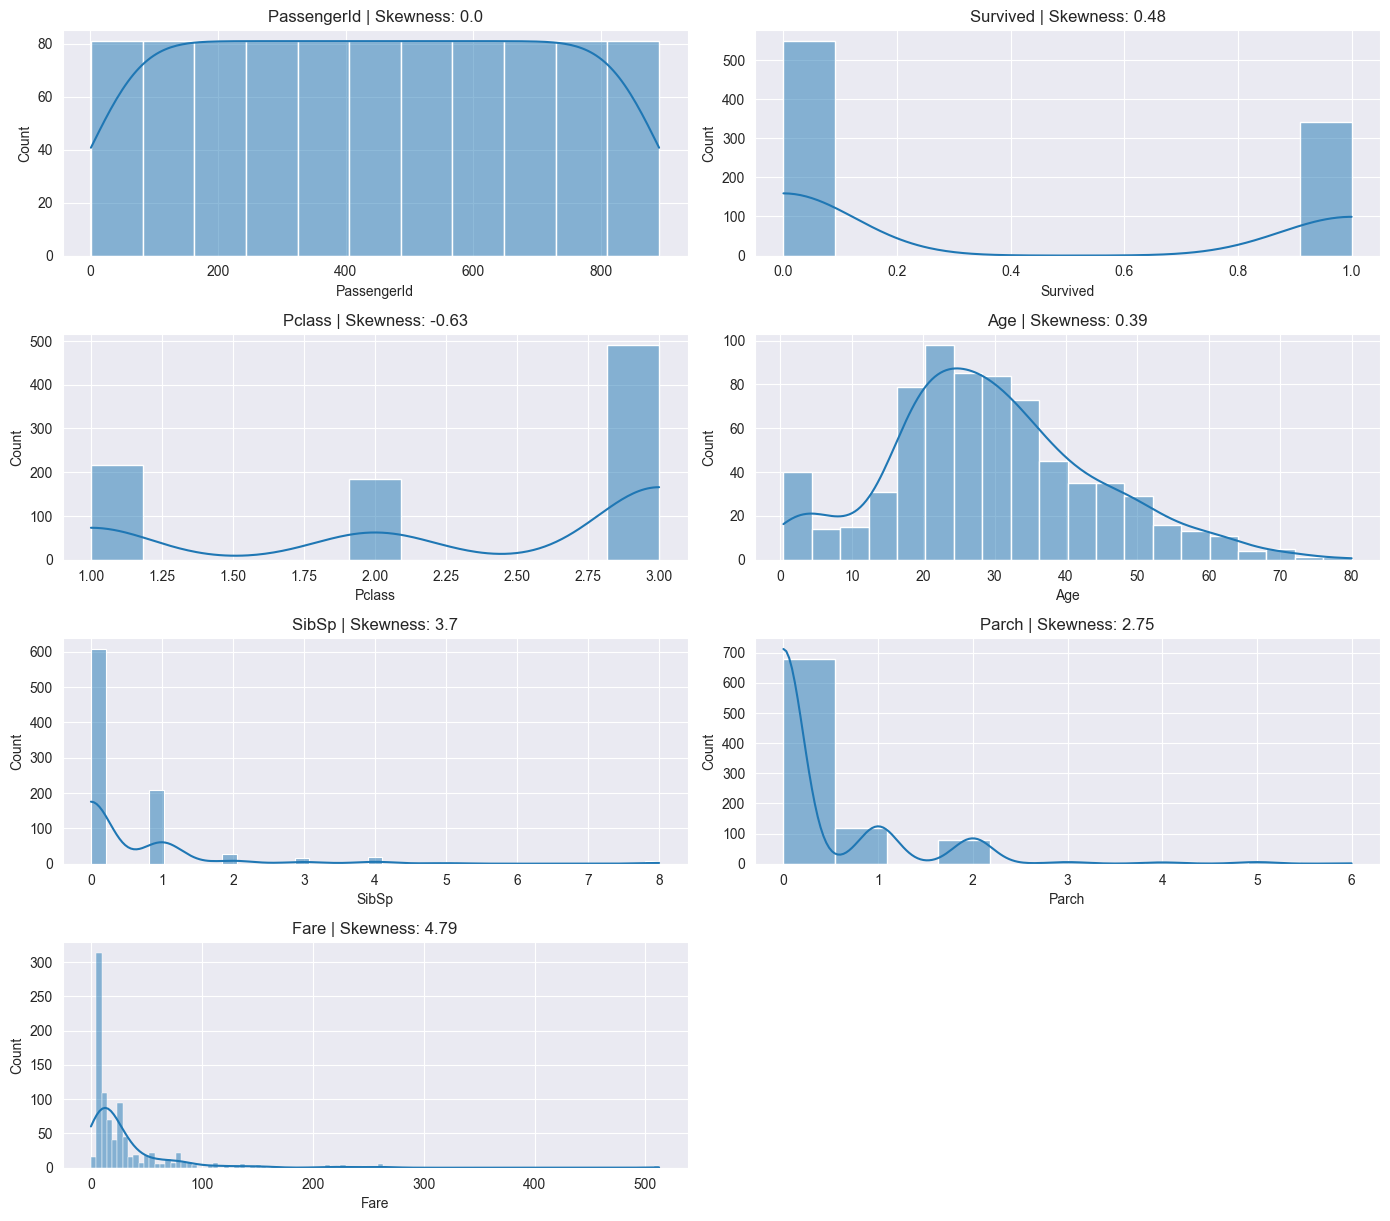

In [16]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<Axes: >

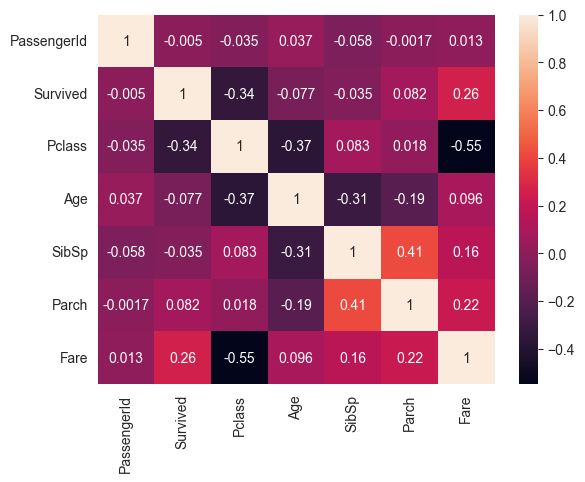

In [18]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

<Axes: xlabel='Survived', ylabel='count'>

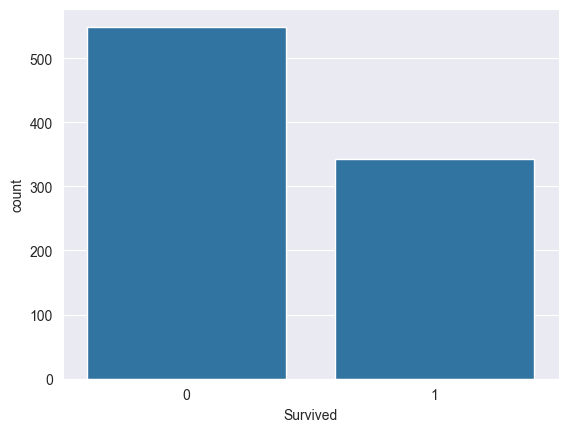

In [19]:
sns.countplot(x='Survived', data=df)

In [20]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24708\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [21]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24708\2061050926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)


In [22]:
df.drop('Cabin',axis=1,inplace = True)
df.drop('Name',axis=1,inplace = True)

In [23]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [24]:
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,True
1,1,1,1,0.663861,1,0,0.786845,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,True
3,1,1,1,0.433312,1,0,0.420730,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,-0.181487,0,0,-0.386671,False,True
887,1,1,1,-0.796286,0,0,-0.044381,False,True
888,0,3,1,-0.104637,1,2,-0.176263,False,True
889,1,1,0,-0.258337,0,0,-0.044381,False,False


([<matplotlib.axis.XTick at 0x261c51243d0>,
 [Text(0, 0, 'male'), Text(1, 0, 'female')])

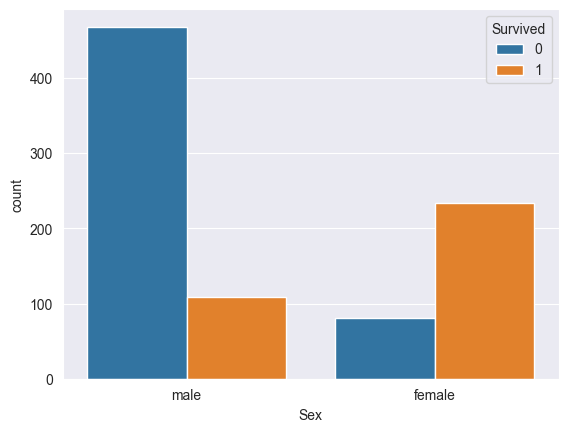

In [27]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xticks(ticks=[0, 1], labels=['male', 'female'])

<Axes: xlabel='Age', ylabel='Count'>

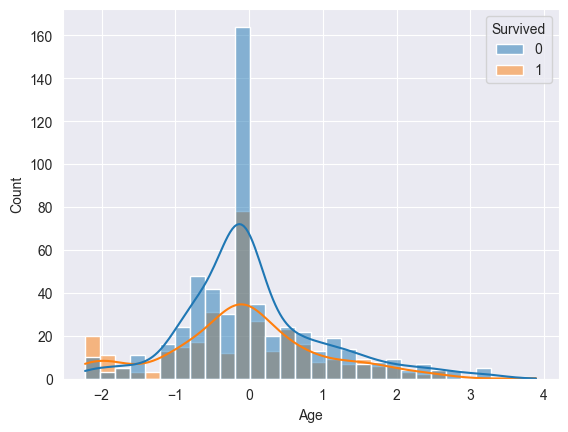

In [28]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)

<Axes: >

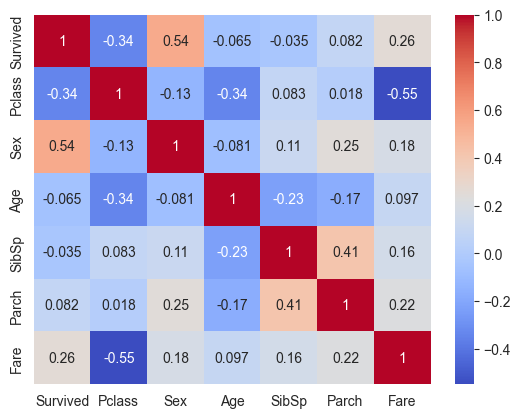

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")

In [ ]:
sns.pairplot(df, hue='Survived')


In [ ]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

In [67]:
from sklearn.svm import SVC
model = SVC(probability=True)

In [69]:
model.fit(X_train,y_train)

SVC(probability=True)

In [73]:
y_pred=model.predict(X_test)

In [75]:
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

0.821542903772519


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



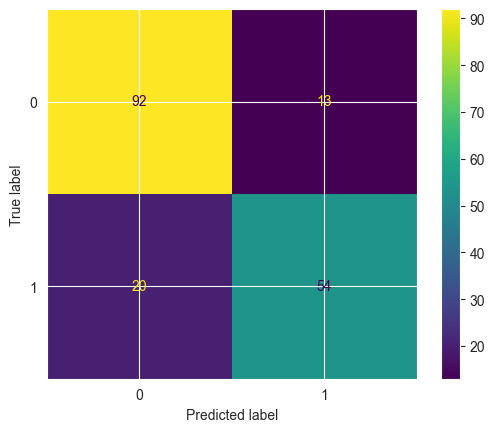

In [79]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()